# 1 — What a Gaussian mixture model is (short statement)

A Gaussian mixture model represents a probability density as a weighted sum of (K) multivariate Gaussian components. Each component (k) has a weight (\pi_k), mean (\mu_k), and covariance (\Sigma_k). The model density is
$$
p(x \mid \Theta) ;=; \sum_{k=1}^K \pi_k , \mathcal{N}(x \mid \mu_k,\Sigma_k),
$$
where $\sum_k \pi_k = 1$, and $\Theta={\pi_k,\mu_k,\Sigma_k}_{k=1}^K$. This is a generative, probabilistic clustering model that gives soft assignments via posterior probabilities. ([Scikit-learn][1])

[1]: https://scikit-learn.org/stable/modules/mixture.html?utm_source=chatgpt.com "2.1. Gaussian mixture models"


---

# 2 — Probabilistic model and latent variables (math)

Introduce a discrete latent variable $z\in{1,\dots,K}$ indicating which component generated (x). The joint model is
$$
p(x,z=k) = \pi_k ,\mathcal{N}(x\mid\mu_k,\Sigma_k).
$$
Marginal over (z) gives the mixture density above. The posterior (responsibility) that component (k) generated a given (x) is
$$
\gamma(z_k \mid x) ;=; p(z=k \mid x)
;=; \frac{\pi_k ,\mathcal{N}(x\mid\mu_k,\Sigma_k)}{\sum_{j=1}^K \pi_j ,\mathcal{N}(x\mid\mu_j,\Sigma_j)}.
$$
These posteriors are central to learning via expectation maximization. ([mlg.eng.cam.ac.uk][2])

[2]: https://mlg.eng.cam.ac.uk/zoubin/tut06/Bishop-CUED-2006.pdf?utm_source=chatgpt.com "Mixture Models and the EM Algorithm"

---

# 3 — Maximum likelihood and the EM algorithm (derivation, steps)

We fit parameters by maximum likelihood on observed data (X={x_n}*{n=1}^N). The log likelihood is
$$
\mathcal{L}(\Theta) ;=; \sum*{n=1}^N \log\Big( \sum_{k=1}^K \pi_k ,\mathcal{N}(x_n\mid\mu_k,\Sigma_k) \Big).
$$
This objective has no closed form solution because of the log of a sum. EM solves it by alternating:

E step

* Compute responsibilities using current parameters:
  $$
  \gamma_{nk} ;\equiv; p(z_n=k\mid x_n) ;=; \frac{\pi_k ,\mathcal{N}(x_n\mid\mu_k,\Sigma_k)}{\sum_j \pi_j ,\mathcal{N}(x_n\mid\mu_j,\Sigma_j)}.
  $$

M step

* Update parameters using the responsibilities as soft counts:
  $$
  N_k = \sum_{n=1}^N \gamma_{nk},
  \qquad
  \pi_k \leftarrow \frac{N_k}{N},
  $$
  $$
  \mu_k \leftarrow \frac{1}{N_k}\sum_{n=1}^N \gamma_{nk}, x_n,
  \qquad
  \Sigma_k \leftarrow \frac{1}{N_k}\sum_{n=1}^N \gamma_{nk},(x_n-\mu_k)(x_n-\mu_k)^\top.
  $$

Iterate E and M until convergence of the log likelihood or parameters. This is the standard EM for GMM. ([mlg.eng.cam.ac.uk][2])

[2]: https://mlg.eng.cam.ac.uk/zoubin/tut06/Bishop-CUED-2006.pdf?utm_source=chatgpt.com "Mixture Models and the EM Algorithm"



---

# 4 — Decision boundaries between components (derivation and forms)

For classification or hard assignment you can use the Bayes rule: assign (x) to the component (k) with largest posterior (\gamma_{nk}). For two components (i) and (j) the boundary is where their posteriors tie:
$$
\pi_i ,\mathcal{N}(x\mid\mu_i,\Sigma_i) ;=; \pi_j ,\mathcal{N}(x\mid\mu_j,\Sigma_j).
$$
Take logs and rearrange to get
$$
\log\pi_i - \tfrac12\log|\Sigma_i| - \tfrac12(x-\mu_i)^\top\Sigma_i^{-1}(x-\mu_i)
;=;
\log\pi_j - \tfrac12\log|\Sigma_j| - \tfrac12(x-\mu_j)^\top\Sigma_j^{-1}(x-\mu_j).
$$
Bringing all terms to one side yields an expression of the form
$$
x^\top A x ;+; b^\top x ;+; c ;=; 0,
$$
with matrix (A) coming from the difference of precision matrices, vector (b) from linear terms in (x), and scalar (c) from constants. That is a quadratic boundary in (x). Special cases:

* If $\Sigma_i = \Sigma_j$ (shared covariance), the quadratic terms cancel and the boundary becomes linear. This is the same algebra as Quadratic Discriminant Analysis reducing to Linear Discriminant Analysis when covariances are equal. ([San José State University][3])

Short summary of shapes

* equal isotropic covariances: linear boundary (hyperplane in higher D).
* different covariances: quadratic boundary (ellipses, circles, more complex curves in 2D).
* unequal weights $\pi_k$ shift boundaries toward lower weight components. ([web2.qatar.cmu.edu][4])


[3]: https://www.sjsu.edu/faculty/guangliang.chen/Math251F18/lec4bayes.pdf?utm_source=chatgpt.com "LEC 4: Bayes classifiers"
[4]: https://web2.qatar.cmu.edu/~gdicaro/10315-Fall19/lectures/EM-10401.pdf?utm_source=chatgpt.com "Gaussian Mixture Model"

---

# 5 — Relationship to K-means and other methods (comparison table)

Quick comparison points you must know

* **Model type**

  * GMM: probabilistic generative model, soft assignments, per-component covariances.
  * K-means: non-probabilistic, hard assignments, each cluster is a centroid. ([Wikipedia][5])

* **Cluster shape**

  * GMM: elliptical clusters allowed, sizes differ, covariances model orientation and spread.
  * K-means: implicitly spherical clusters of similar scale, boundaries are Voronoi cells. ([Wikipedia][5])

* **Assignments**

  * GMM: posterior probabilities, useful for uncertainty or soft labeling.
  * K-means: nearest centroid hard assignment.

* **Objective**

  * GMM: maximize likelihood of mixture model, solved by EM.
  * K-means: minimize sum of squared distances to centroids.

* **Initialization**

  * GMM often initialized with K-means centroids. K-means++ improves K-means initialization. ([Scikit-learn][1])

* **Model selection**

  * GMM supports model selection using AIC or BIC to choose (K) and covariance type. K-means uses elbow or silhouette. ([Scikit-learn][6])

[1]: https://scikit-learn.org/stable/modules/mixture.html?utm_source=chatgpt.com "2.1. Gaussian mixture models"
[5]: https://en.wikipedia.org/wiki/K-means_clustering?utm_source=chatgpt.com "K-means clustering"
[6]: https://scikit-learn.ru/stable/auto_examples/mixture/plot_gmm_selection.html?utm_source=chatgpt.com "Gaussian Mixture Model Selection - scikit-learn"

---

# 6 — Practical issues and best practices

* **Covariance type**. In practice choose among full, tied, diagonal, spherical. Full is flexible but needs more data. Diagonal speeds computation and regularizes shape. scikit-learn documents these types. ([Scikit-learn][7])
* **Regularization**. Small regularization of covariances avoids singular matrices, especially when components collapse.
* **Initialization**. Use multiple restarts and K-means initialization to avoid bad local optima.
* **Model selection**. Use BIC to pick number of components and covariance type. BIC penalizes extra parameters. ([Scikit-learn][6])
* **Scalability**. EM is iterative and can be slower than K-means on large data. For large scale, consider mini-batch methods or variational/Bayesian GMM. ([Scikit-learn][8])

[6]: https://scikit-learn.ru/stable/auto_examples/mixture/plot_gmm_selection.html?utm_source=chatgpt.com "Gaussian Mixture Model Selection - scikit-learn"
[7]: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html?utm_source=chatgpt.com "GaussianMixture"
[8]: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html?utm_source=chatgpt.com "BayesianGaussianMixture"


---

# 7 — Real world examples and use cases

* **Speaker identification**. Model short windows of audio features as mixtures of Gaussians per speaker. Likelihood ratios separate speakers.
* **Image segmentation**. Color or texture features cluster with GMM to segment an image into regions.
* **Anomaly detection**. Fit GMM to normal data, flag low-likelihood observations as anomalies.
* **Finance**. Model returns with mixtures to capture heavy tails and multimodality.
  References and practical tutorials show these common uses. ([mlg.eng.cam.ac.uk][2])

[2]: https://mlg.eng.cam.ac.uk/zoubin/tut06/Bishop-CUED-2006.pdf?utm_source=chatgpt.com "Mixture Models and the EM Algorithm"

---

# 8 — Worked numerical example and decision boundary algebra (two-component case)

Take (K=2). Decision boundary where posterior tie implies
$$
\log\pi_1 -\tfrac12\log|\Sigma_1| -\tfrac12(x-\mu_1)^\top\Sigma_1^{-1}(x-\mu_1)
= \log\pi_2 -\tfrac12\log|\Sigma_2| -\tfrac12(x-\mu_2)^\top\Sigma_2^{-1}(x-\mu_2).
$$
Rearrange
$$
\tfrac12 x^\top(\Sigma_2^{-1}-\Sigma_1^{-1})x

* x^\top(\Sigma_1^{-1}\mu_1 - \Sigma_2^{-1}\mu_2)
* \big( \tfrac12 \mu_2^\top\Sigma_2^{-1}\mu_2 - \tfrac12 \mu_1^\top\Sigma_1^{-1}\mu_1 + \log\frac{\pi_2}{\pi_1} + \tfrac12\log\frac{|\Sigma_2|}{|\Sigma_1|} \big)
  = 0.
  $$

So compute the matrix $A=\tfrac12(\Sigma_2^{-1}-\Sigma_1^{-1})$, vector $b=\Sigma_1^{-1}\mu_1 - \Sigma_2^{-1}\mu_2$, scalar $c=\dots$ above. Solve for the locus of points satisfying $x^\top A x + b^\top x + c = 0$. In 2D that is a conic. If $\Sigma_1=\Sigma_2$ then $A=0$ and you get a linear boundary. ([San José State University][3])

[3]: https://www.sjsu.edu/faculty/guangliang.chen/Math251F18/lec4bayes.pdf?utm_source=chatgpt.com "LEC 4: Bayes classifiers"

---

# 9 — Visualization with Python (script and notes)

The demonstration here that:

* generates a 2D synthetic dataset from three Gaussians,
* fits a GaussianMixture model using scikit-learn,
* fits KMeans for comparison,
* plots: true labels, GMM predicted labels with covariance ellipses, KMeans labels and centers, and the GMM decision regions obtained by evaluating posteriors on a grid.


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File

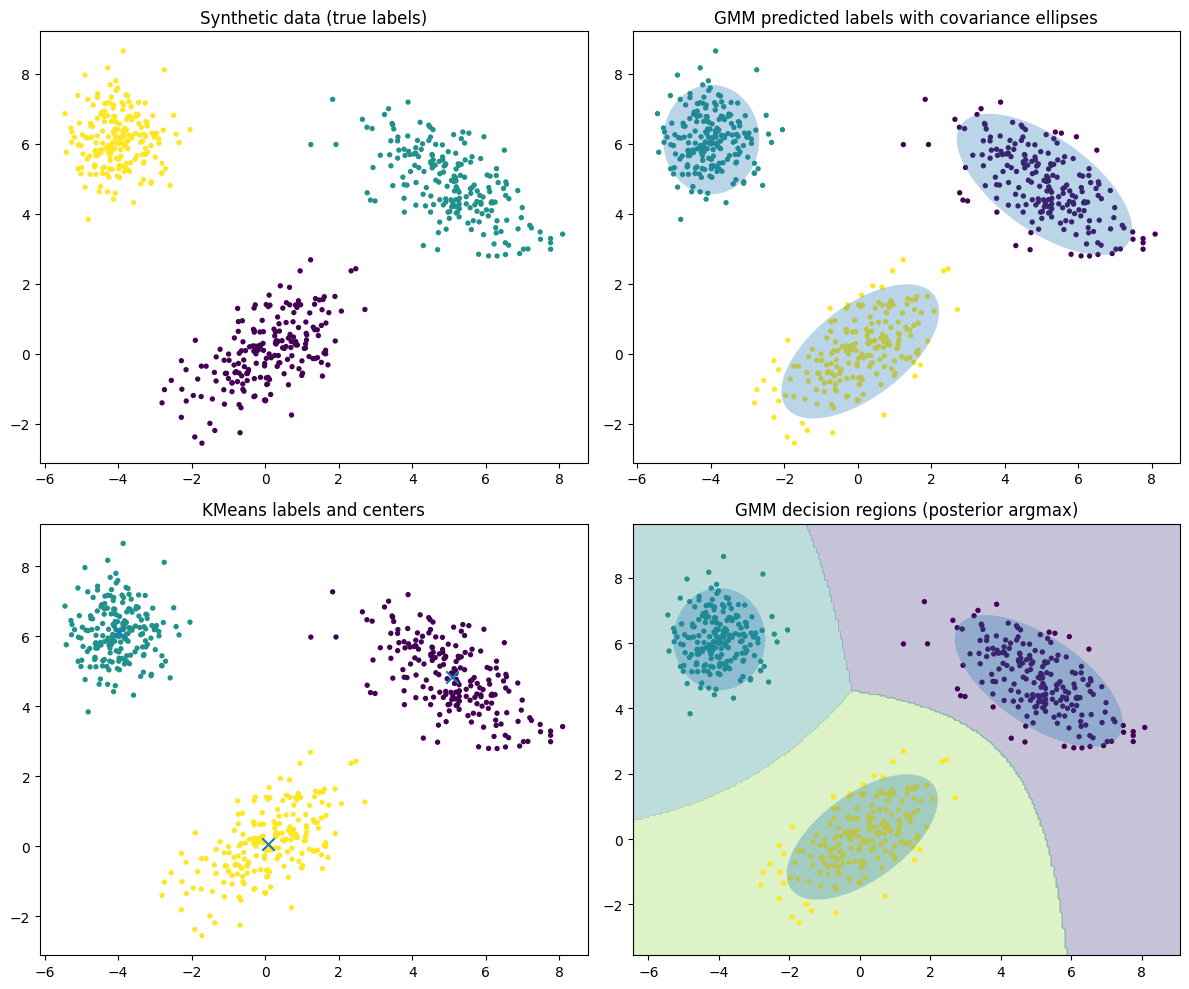

weights: [0.33328888 0.33333333 0.33337779]
means:
 [[ 5.07599042  4.84122412]
 [-3.98608573  6.12068193]
 [ 0.06783091  0.06541255]]
covariances:
 [[[ 1.4217226  -0.76348175]
  [-0.76348175  1.01876032]]

 [[ 0.42657733  0.00175485]
  [ 0.00175485  0.61249238]]

 [[ 1.1513149   0.61250313]
  [ 0.61250313  0.91970867]]]


In [1]:
# save as gmm_demo.py and run with Python 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse

np.random.seed(0)

# synthetic data: 3 Gaussians
n_per = 200
means = np.array([[0, 0], [5, 5], [-4, 6]])
covs = np.array([
    [[1.2, 0.6], [0.6, 0.9]],
    [[1.5, -0.8], [-0.8, 1.0]],
    [[0.5, 0.0], [0.0, 0.7]]
])
X = np.vstack([np.random.multivariate_normal(means[i], covs[i], size=n_per)
               for i in range(3)])
y_true = np.repeat(np.arange(3), n_per)

# fit GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=1, n_init=5)
gmm.fit(X)
gmm_labels = gmm.predict(X)

# fit KMeans
kmeans = KMeans(n_clusters=3, random_state=1, n_init=10)
kmeans.fit(X)

# helper to draw covariance ellipses
def plot_cov_ellipse(ax, mean, cov, n_std=2.0):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals = vals[order]
    vecs = vecs[:, order]
    angle = np.degrees(np.arctan2(vecs[1,0], vecs[0,0]))
    width, height = 2 * n_std * np.sqrt(vals)
    ell = Ellipse(xy=mean, width=width, height=height, angle=angle, alpha=0.3)
    ax.add_patch(ell)

# plotting (4 small figures)
fig, axes = plt.subplots(2,2, figsize=(12,10))
ax = axes.ravel()

ax[0].scatter(X[:,0], X[:,1], c=y_true, s=8)
ax[0].set_title("Synthetic data (true labels)")

ax[1].scatter(X[:,0], X[:,1], c=gmm_labels, s=8)
for k in range(3):
    plot_cov_ellipse(ax[1], gmm.means_[k], gmm.covariances_[k])
ax[1].set_title("GMM predicted labels with covariance ellipses")

ax[2].scatter(X[:,0], X[:,1], c=kmeans.labels_, s=8)
ax[2].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
              marker='x', s=80)
ax[2].set_title("KMeans labels and centers")

# decision regions via posterior argmax
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 250),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 250))
grid = np.column_stack([xx.ravel(), yy.ravel()])
probs = gmm.predict_proba(grid)
Z = probs.argmax(axis=1).reshape(xx.shape)
ax[3].contourf(xx, yy, Z, levels=np.arange(4)-0.5, alpha=0.3)
ax[3].scatter(X[:,0], X[:,1], c=gmm_labels, s=8)
for k in range(3):
    plot_cov_ellipse(ax[3], gmm.means_[k], gmm.covariances_[k])
ax[3].set_title("GMM decision regions (posterior argmax)")

plt.tight_layout()
plt.show()

# print fitted params
print("weights:", gmm.weights_)
print("means:\n", gmm.means_)
print("covariances:\n", gmm.covariances_)

Notes

* The script uses `GaussianMixture` from scikit-learn. Pick `covariance_type` among `full`, `tied`, `diag`, `spherical` depending on data and sample size. See scikit-learn docs. ([Scikit-learn][7])
* For model selection try `GaussianMixture` with different `n_components` and compare BIC. ([Scikit-learn][6])


[6]: https://scikit-learn.ru/stable/auto_examples/mixture/plot_gmm_selection.html?utm_source=chatgpt.com "Gaussian Mixture Model Selection - scikit-learn"
[7]: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html?utm_source=chatgpt.com "GaussianMixture"

---

# 10 — Short checklist for applying GMM in practice

1. Inspect data scale and dimensionality. Standardize if needed.
2. Choose reasonable range for (K). Use domain knowledge.
3. Initialize with K-means, use multiple restarts.
4. Try covariance types: start with diagonal or tied if data is limited.
5. Regularize covariances if they become singular.
6. Use BIC or cross validation for model selection.
7. If you need robust Bayesian inference for number of components use `BayesianGaussianMixture` or variational methods. ([Scikit-learn][8])

[8]: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html?utm_source=chatgpt.com "BayesianGaussianMixture"

---

=== Initial parameters ===
pi: [0.5 0.5]
mu:
 [[0.5 0. ]
 [4.5 4. ]]
Sigma[0]:
 [[0.8 0. ]
 [0.  0.8]]
Sigma[1]:
 [[0.9 0.2]
 [0.2 0.9]]

=== E-step calculations (printed) ===

Data point n=1, x=[0. 0.]
 pdf_k1 = 0.170166, pdf_k2 = 0.000000
 joint_k1 = pi1*pdf_k1 = 0.500000*0.170166 = 0.085083
 joint_k2 = pi2*pdf_k2 = 0.500000*0.000000 = 0.000000
 gamma_k1 = joint_k1 / (joint_k1+joint_k2) = 1.000000
 gamma_k2 = joint_k2 / (joint_k1+joint_k2) = 0.000000

Data point n=2, x=[1.  0.5]
 pdf_k1 = 0.145550, pdf_k2 = 0.000003
 joint_k1 = pi1*pdf_k1 = 0.500000*0.145550 = 0.072775
 joint_k2 = pi2*pdf_k2 = 0.500000*0.000003 = 0.000001
 gamma_k1 = joint_k1 / (joint_k1+joint_k2) = 0.999982
 gamma_k2 = joint_k2 / (joint_k1+joint_k2) = 0.000018

Data point n=3, x=[4. 4.]
 pdf_k1 = 0.000000, pdf_k2 = 0.156719
 joint_k1 = pi1*pdf_k1 = 0.500000*0.000000 = 0.000000
 joint_k2 = pi2*pdf_k2 = 0.500000*0.156719 = 0.078360
 gamma_k1 = joint_k1 / (joint_k1+joint_k2) = 0.000000
 gamma_k2 = joint_k2 / (joint_k1+

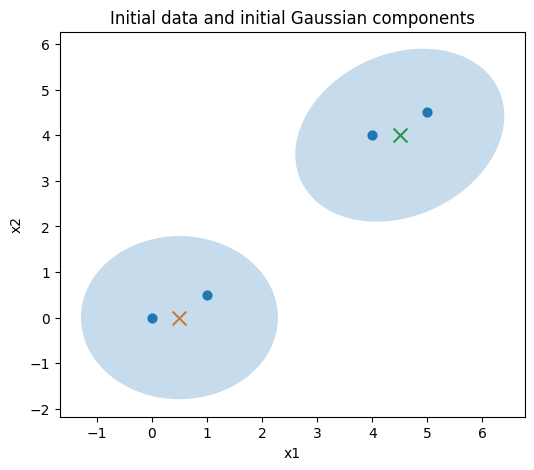

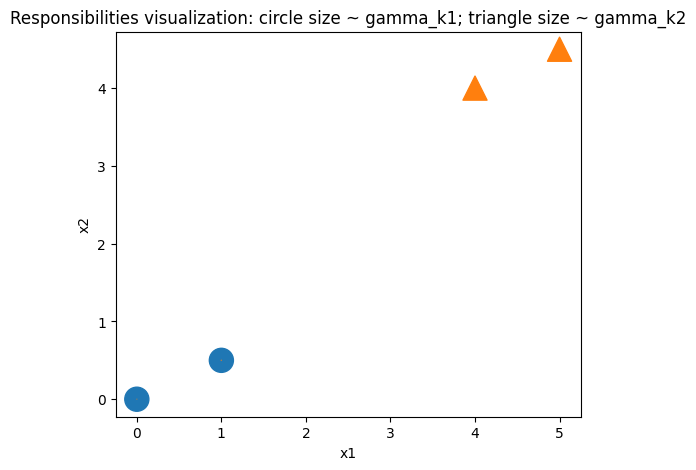

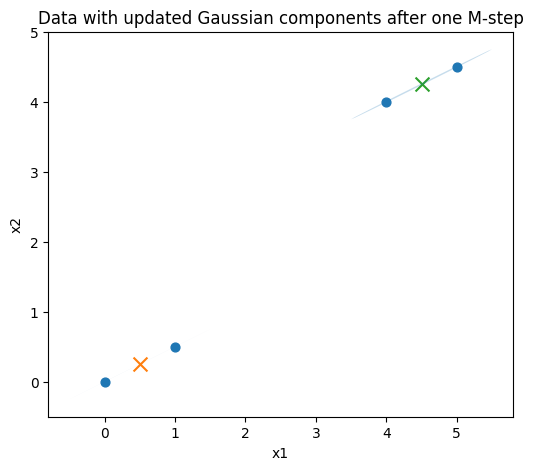


=== Concise summary ===
Component 1:
  old mean = [0.5 0. ], new mean = [0.499996 0.249998]
  old pi = 0.500000, new pi = 0.499995
  old Sigma =
[[0.8 0. ]
 [0.  0.8]]
  new Sigma =
[[0.25   0.125 ]
 [0.125  0.0625]]

Component 2:
  old mean = [4.5 4. ], new mean = [4.499968 4.249966]
  old pi = 0.500000, new pi = 0.500005
  old Sigma =
[[0.9 0.2]
 [0.2 0.9]]
  new Sigma =
[[0.25011  0.125119]
 [0.125119 0.062628]]



In [5]:
# Numeric EM iteration demonstration (visible outputs + plots)
# - Small 2D dataset (4 points)
# - K = 2 components
# - Show initial parameters, compute E-step responsibilities (explicit numbers),
#   then compute M-step updates with the arithmetic shown.
# - Produce three separate plots:
#   1) initial data with initial Gaussian ellipses and means
#   2) responsibilities visualization (marker size ~ responsibility)
#   3) updated Gaussians after one M-step with new means and covariances
#
# Uses: numpy, matplotlib, pandas, scipy (for multivariate normal pdf)
# The code will also display a small table using pandas.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse

np.set_printoptions(precision=6, suppress=True)

# Small dataset (N=4)
X = np.array([
    [0.0, 0.0],
    [1.0, 0.5],
    [4.0, 4.0],
    [5.0, 4.5]
])
N = X.shape[0]

# Number of components
K = 2

# Initial parameters (chosen to make the example clear)
pi = np.array([0.5, 0.5])  # mixing coefficients
mu = np.array([[0.5, 0.0], [4.5, 4.0]])  # initial means for component 1 and 2
Sigma = np.array([
    [[0.8, 0.0], [0.0, 0.8]],   # component 1 covariance (isotropic-ish)
    [[0.9, 0.2], [0.2, 0.9]]    # component 2 covariance (some correlation)
])

def ellipse_from_cov(mean, cov, n_std=2.0):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals = vals[order]
    vecs = vecs[:, order]
    angle = np.degrees(np.arctan2(vecs[1,0], vecs[0,0]))
    width, height = 2 * n_std * np.sqrt(vals)
    return width, height, angle

def plot_cov_ellipse(ax, mean, cov, n_std=2.0):
    width, height, angle = ellipse_from_cov(mean, cov, n_std=n_std)
    ell = Ellipse(xy=mean, width=width, height=height, angle=angle, alpha=0.25)
    ax.add_patch(ell)

# --- E-step: compute responsibilities gamma[n,k] ---
pdfs = np.zeros((N, K))
for k in range(K):
    mvn = multivariate_normal(mean=mu[k], cov=Sigma[k], allow_singular=False)
    pdfs[:, k] = mvn.pdf(X)

# joint = pi_k * N(x|mu_k,Sigma_k)
joint = pdfs * pi.reshape(1, K)
# responsibilities (normalized)
gamma = joint / joint.sum(axis=1, keepdims=True)

# Present E-step results in a table
df = pd.DataFrame({
    "x1": X[:,0],
    "x2": X[:,1],
    "pdf_k1": pdfs[:,0],
    "pdf_k2": pdfs[:,1],
    "joint_k1": joint[:,0],
    "joint_k2": joint[:,1],
    "gamma_k1": gamma[:,0],
    "gamma_k2": gamma[:,1]
})

# Display the table to the user (uses a pandas DataFrame)
# import caas_jupyter_tools as tools; tools.display_dataframe_to_user("E-step responsibilities", df)

# Print step-by-step numeric calculations
print("=== Initial parameters ===")
print("pi:", pi)
print("mu:\n", mu)
print("Sigma[0]:\n", Sigma[0])
print("Sigma[1]:\n", Sigma[1])
print("\n=== E-step calculations (printed) ===")
for n in range(N):
    print(f"\nData point n={n+1}, x={X[n]}")
    print(f" pdf_k1 = {pdfs[n,0]:.6f}, pdf_k2 = {pdfs[n,1]:.6f}")
    print(f" joint_k1 = pi1*pdf_k1 = {pi[0]:.6f}*{pdfs[n,0]:.6f} = {joint[n,0]:.6f}")
    print(f" joint_k2 = pi2*pdf_k2 = {pi[1]:.6f}*{pdfs[n,1]:.6f} = {joint[n,1]:.6f}")
    print(f" gamma_k1 = joint_k1 / (joint_k1+joint_k2) = {gamma[n,0]:.6f}")
    print(f" gamma_k2 = joint_k2 / (joint_k1+joint_k2) = {gamma[n,1]:.6f}")

# --- M-step: update parameters using gamma ---
N_k = gamma.sum(axis=0)  # effective counts
pi_new = N_k / N

# updated means
mu_new = np.zeros_like(mu)
for k in range(K):
    mu_new[k] = (gamma[:, k].reshape(-1,1) * X).sum(axis=0) / N_k[k]

# updated covariances
Sigma_new = np.zeros_like(Sigma)
for k in range(K):
    diffs = X - mu_new[k]
    # weighted outer products
    num = np.zeros((2,2))
    for n in range(N):
        num += gamma[n,k] * np.outer(diffs[n], diffs[n])
    Sigma_new[k] = num / N_k[k]

# Show numeric M-step arithmetic
print("\n\n=== M-step updates (numeric) ===")
print("N_k (effective counts):", N_k)
for k in range(K):
    print(f"\nComponent {k+1}:")
    print(f" pi_new = N_k/N = {N_k[k]:.6f}/{N} = {pi_new[k]:.6f}")
    print(f" mu_new (numerator sums) = sum_n gamma_nk * x_n = {(gamma[:,k].reshape(-1,1)*X).sum(axis=0)}")
    print(f" mu_new = {mu_new[k]}")
    print(f" Sigma_new numerator (sum gamma * (x-mu)(x-mu)^T) =")
    diffs = X - mu_new[k]
    for n in range(N):
        mat = gamma[n,k] * np.outer(diffs[n], diffs[n])
        print(f"  n={n+1}, gamma={gamma[n,k]:.6f}, outer=\n{np.outer(diffs[n], diffs[n])}, weighted=\n{mat}")
    print(f" Sigma_new = numerator / N_k =\n{Sigma_new[k]}")

# Display updated params in a small DataFrame
df_params = pd.DataFrame({
    "component": [1,2],
    "pi_old": pi,
    "pi_new": pi_new,
    "mu_old_x": mu[:,0],
    "mu_old_y": mu[:,1],
    "mu_new_x": mu_new[:,0],
    "mu_new_y": mu_new[:,1]
})
# tools.display_dataframe_to_user("M-step parameter updates", df_params)

# --- PLOTS ---
# Plot 1: Initial Gaussians and data
fig1, ax1 = plt.subplots(figsize=(6,5))
ax1.scatter(X[:,0], X[:,1], s=40)
ax1.set_title("Initial data and initial Gaussian components")
# plot initial means and ellipses
for k in range(K):
    ax1.scatter([mu[k,0]], [mu[k,1]], marker='x', s=100)
    plot_cov_ellipse(ax1, mu[k], Sigma[k])
ax1.set_xlabel("x1"); ax1.set_ylabel("x2")
plt.show()

# Plot 2: Responsibilities visualization
# marker size proportional to responsibility for each component; overlay two scatters.
fig2, ax2 = plt.subplots(figsize=(6,5))
# scatter for component 1 weights (sizes)
sizes1 = 300 * gamma[:,0]  # larger if gamma_k1 large
ax2.scatter(X[:,0], X[:,1], s=sizes1, marker='o')
# scatter for component 2 weights (outline) - plotted on top
sizes2 = 300 * gamma[:,1]
ax2.scatter(X[:,0], X[:,1], s=sizes2, marker='^')
ax2.set_title("Responsibilities visualization: circle size ~ gamma_k1; triangle size ~ gamma_k2")
ax2.set_xlabel("x1"); ax2.set_ylabel("x2")
plt.show()

# Plot 3: Updated Gaussians after M-step
fig3, ax3 = plt.subplots(figsize=(6,5))
ax3.scatter(X[:,0], X[:,1], s=40)
ax3.set_title("Data with updated Gaussian components after one M-step")
# plot updated means and ellipses
for k in range(K):
    ax3.scatter([mu_new[k,0]], [mu_new[k,1]], marker='x', s=100)
    plot_cov_ellipse(ax3, mu_new[k], Sigma_new[k])
ax3.set_xlabel("x1"); ax3.set_ylabel("x2")
plt.show()

# Print final concise summary for the user
print("\n=== Concise summary ===")
for k in range(K):
    print(f"Component {k+1}:")
    print(f"  old mean = {mu[k]}, new mean = {mu_new[k]}")
    print(f"  old pi = {pi[k]:.6f}, new pi = {pi_new[k]:.6f}")
    print(f"  old Sigma =\n{Sigma[k]}\n  new Sigma =\n{Sigma_new[k]}\n")
